In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from BinaryImage import BinaryImage
from SimulatedAnnealing import SimulatedAnnealing
from IPython.display import HTML

In [23]:
%autoreload
bi = BinaryImage(50, 0.2)

for _ in range(20):
    bi.random_init_state()
    bi.save_frame()

animation = bi.animation()
HTML(animation.to_jshtml())

In [31]:
a = np.random.randint(0, 10, (10, 10))
a

array([[3, 1, 2, 7, 0, 5, 9, 8, 2, 5],
       [5, 2, 4, 2, 4, 5, 0, 3, 1, 3],
       [1, 6, 5, 6, 7, 1, 3, 0, 6, 5],
       [3, 7, 3, 5, 4, 7, 4, 4, 1, 5],
       [6, 4, 9, 0, 8, 5, 2, 7, 7, 5],
       [2, 0, 7, 8, 8, 7, 1, 5, 4, 6],
       [6, 1, 4, 2, 7, 6, 1, 6, 9, 8],
       [4, 4, 6, 0, 0, 0, 7, 3, 6, 1],
       [8, 4, 6, 0, 1, 7, 5, 7, 3, 4],
       [9, 6, 5, 5, 0, 4, 9, 3, 0, 7]])

In [69]:
# 1, 3
# sąsiedztwo 1
row, col = 0, 3
k = 2
n = 6


for i in range(-k, k + 1):
    for j in range(-k, k + 1):
        # print(i + k, j + k)
        print((row + i) % n, (col + j) % n)

# print(row - k, row + k + 1, col - k, col + k + 1)

# a.take((), mode="wrap")

# a[row - k : row + k + 1, col - k : col + k + 1]

4 1
4 2
4 3
4 4
4 5
5 1
5 2
5 3
5 4
5 5
0 1
0 2
0 3
0 4
0 5
1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5


In [3]:
%autoreload
# bi = BinaryImage(6, 0.35, 1, np.arange(1, 10).reshape(3, 3))

neighborhood = [(-1, -1, 1), (0, -1, 1), (1, -1, 1),
                (-1,  0, 1),             (1,  0, 1),
                (-1,  1, 1), (0,  1, 1), (1,  1, 1)]

bi = BinaryImage(6, 0.3, neighborhood)

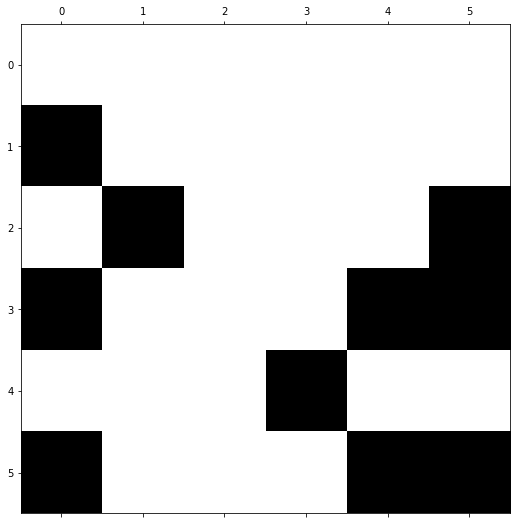

-4

In [14]:
bi.plot()
# bi.neighborhood_cost(0, 3)
bi.cost()

# print(bi.image)
# print(bi.image[1, 0])

# bi.local_cost(2, 1, 2, 2)

In [16]:
bi.random_move()

(26, (3, 5, 2, 0, 26))

8.919730937646046


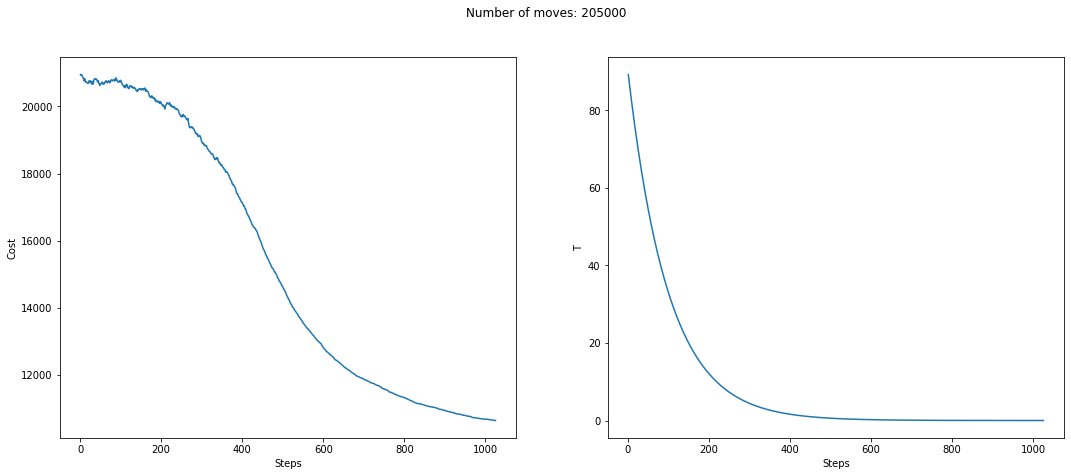

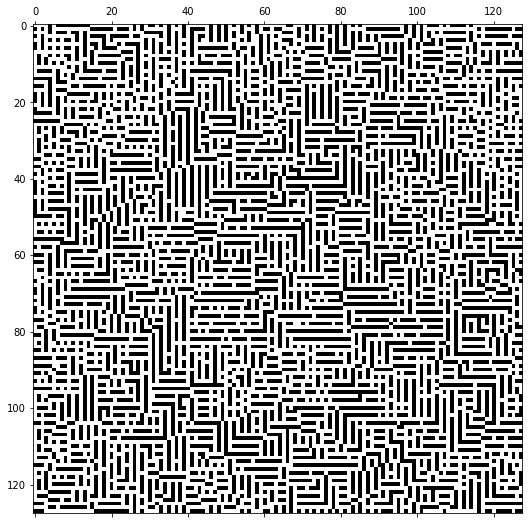

In [41]:
%autoreload

from random import seed
seed(123)
# neighborhood_cost = np.array([[ 2,  1, -2],
#                               [ 1,  0,  1],
#                               [-2,  1,  2]])

neighborhood = [(-1, -1, 1), (0, -1, 1), (1, -1, 1),
                (-1,  0, 1),             (1,  0, 1),
                (-1,  1, 1), (0,  1, 1), (1,  1, 1)]

# neighborhood = [(-1, -1,  2), (0, -1, 1), (1, -1, -2),
#                 (-1,  0,  1),             (1,  0,  1),
#                 (-1,  1, -2), (0,  1, 1), (1,  1,  2)]


bi = BinaryImage(128, 0.4, neighborhood)

t_0 = SimulatedAnnealing.init_temperature(bi, 100)
print(t_0)

# sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=500, alfa=0.995, stop=-np.inf)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=200, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=200)
HTML(animation.to_jshtml())

# print(bi.cost())

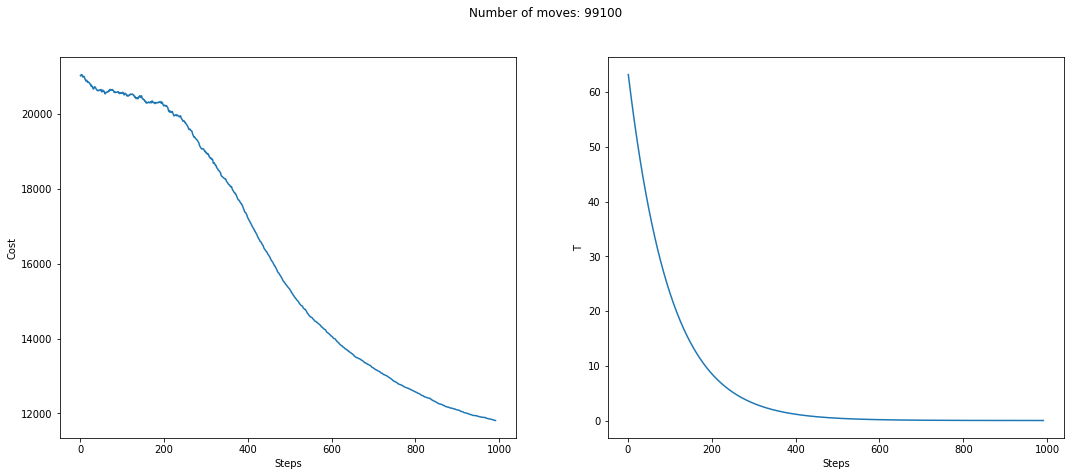

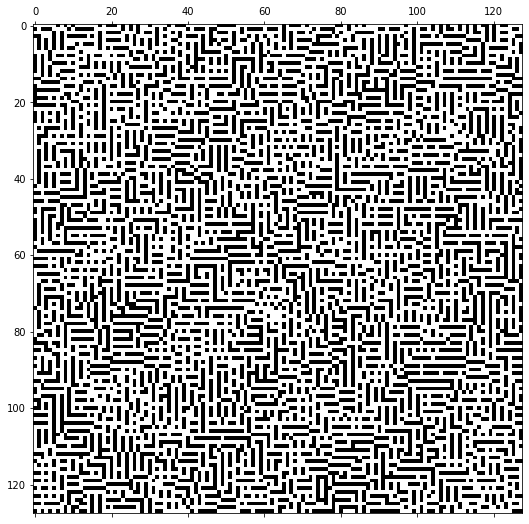

In [32]:
# ładne
neighborhood = [(-1, -1, 1), (0, -1, 1), (1, -1, 1),
                (-1,  0, 1),             (1,  0, 1),
                (-1,  1, 1), (0,  1, 1), (1,  1, 1)]
bi = BinaryImage(128, 0.4, neighborhood)
t_0 = SimulatedAnnealing.init_temperature(bi, 100)
sa = SimulatedAnnealing(bi, T=10 * t_0, T_min=0.003, n=100, alfa=0.99, stop=-np.inf)
animation = sa.optimize(save_animation=True, iterations_per_frame=100)
HTML(animation.to_jshtml())